# Install required libraries
To install the required libraries from the requirements file, use the following command:
"pip install -r requirements.txt"

# 0. Initialization

In [34]:
import numpy as np # a library for numerical computations and handling arrays
import pandas as pd #  a library for data manipulation and analysis, often used for handling tabular data

# Visualisation Library
import matplotlib.pyplot as plt # module for data visualization through plots and charts
import seaborn as sns # a data visualization library built on Matplotlib, offering advanced plotting functions and attractive visual styles
import matplotlib.ticker as ticker
# Classification continous
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Classification Categorial
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

# Processing Classification
from sklearn.model_selection import train_test_split
from sklearn import metrics

# avoid displaying warnings
import warnings
warnings.filterwarnings("ignore")

# 1. Collecte the Data

In [3]:
# Load the dataset from the specified path
data = pd.read_csv("../data/G3_immobiliers.csv")

# 2. Data Cleaning and Preparation

In [4]:
# Display the first 10 rows of the dataset to understand its structure
data.head(10)

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,section_prefixe
0,2022-1343146,2022-02-04,1,Vente,420000.0,NaN,NaN,LA CADISCIE,B009,81220.0,...,NaN,NaN,T,terres,NaN,NaN,1215.0,1.950729,43.64992,0000A
1,2022-1343521,2022-01-28,1,Vente,1500.0,NaN,NaN,SERRO,B168,81260.0,...,NaN,NaN,P,prés,NaN,NaN,1000.0,2.5195,43.618791,0000C
2,2022-1343592,2022-01-28,2,Vente,105000.0,NaN,NaN,PUECH ROUGE,B026,81170.0,...,NaN,NaN,P,prés,NaN,NaN,3900.0,1.896586,44.044786,0000A
3,2022-1343732,2022-02-10,1,Vente,5000.0,NaN,NaN,FOURMENTAL,B029,81300.0,...,NaN,NaN,T,terres,NaN,NaN,2770.0,2.031586,43.697737,0000B
4,2022-1343732,2022-02-10,1,Vente,5000.0,NaN,NaN,FOURMENTAL,B029,81300.0,...,NaN,NaN,T,terres,NaN,NaN,591.0,2.031218,43.697683,0000B
5,2022-1343755,2022-02-15,1,Vente,31500.0,NaN,NaN,MASCALE BAS,B081,81800.0,...,NaN,NaN,S,sols,NaN,NaN,1762.0,1.667288,43.859966,0000C
6,2022-1343755,2022-02-15,1,Vente,31500.0,NaN,NaN,MASCALE BAS,B081,81800.0,...,NaN,NaN,P,prés,NaN,NaN,5505.0,1.66712,43.85981,0000C
7,2022-1343755,2022-02-15,1,Vente,31500.0,NaN,NaN,MASCALE BAS,B081,81800.0,...,NaN,NaN,S,sols,NaN,NaN,18.0,1.667785,43.859678,0000C
8,2022-1343755,2022-02-15,1,Vente,31500.0,NaN,NaN,MASCALE BAS,B081,81800.0,...,NaN,NaN,S,sols,NaN,NaN,70.0,1.667777,43.859631,0000C
9,2022-1343779,2022-02-11,1,Vente,173000.0,NaN,NaN,BAURUNE,B003,81120.0,...,NaN,NaN,T,terres,NaN,NaN,2022.0,2.087579,43.805298,0000D


In [5]:
# Display dataset information including column names, data types, and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146215 entries, 0 to 146214
Data columns (total 41 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   id_mutation                   146215 non-null  object
 1   date_mutation                 146215 non-null  object
 2   numero_disposition            146215 non-null  object
 3   nature_mutation               146215 non-null  object
 4   valeur_fonciere               145482 non-null  object
 5   adresse_numero                67801 non-null   object
 6   adresse_suffixe               2927 non-null    object
 7   adresse_nom_voie              146142 non-null  object
 8   adresse_code_voie             146143 non-null  object
 9   code_postal                   146143 non-null  object
 10  code_commune                  146215 non-null  object
 11  nom_commune                   146215 non-null  object
 12  code_departement              146215 non-null  object
 13 

In [6]:
# Get statistical summaries of numerical columns
data.describe()

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,section_prefixe
count,146215,146215,146215,146215,145482.0,67801.0,2927,146142,146143,146143.0,...,42035.0,63503.0,134685,134685,20624,20624,134685.0,145142.000000,145142.00000,146215
unique,25492,891,15,6,7244.0,2702.0,11,12527,2290,99.0,...,945.0,32.0,22,22,27,27,14490.0,59856.000000,59338.00000,303
top,2022-1349012,2022-07-12,1,Vente,150000.0,1.0,B,LE VILLAGE,B020,81100.0,...,80.0,0.0,S,sols,FRICH,Friche,500.0,2.773587,43.64924,0000B
freq,480,933,102435,142495,1210.0,1954.0,2131,707,1016,8966.0,...,797.0,18640.0,55206,55206,5250,5250,2690.0,171.000000,171.00000,19936


In [7]:
# Check the total number of missing values in each column
data.isnull().sum()

id_mutation                          0
date_mutation                        0
numero_disposition                   0
nature_mutation                      0
valeur_fonciere                    733
adresse_numero                   78414
adresse_suffixe                 143288
adresse_nom_voie                    73
adresse_code_voie                   72
code_postal                         72
code_commune                         0
nom_commune                          0
code_departement                     0
ancien_code_commune             146205
ancien_nom_commune              146205
id_parcelle                          0
ancien_id_parcelle              146205
numero_volume                   145960
lot1_numero                     135814
lot1_surface_carrez             142818
lot2_numero                     143440
lot2_surface_carrez             145473
lot3_numero                     145396
lot3_surface_carrez             145931
lot4_numero                     146035
lot4_surface_carrez      

In [20]:
# Drop unnecessary columns that are not useful for predictive modeling
df_data = data[["valeur_fonciere", "date_mutation",  # Price and transaction date
    "code_postal", "code_commune", "nom_commune", "code_departement",  # Location
    "longitude", "latitude",  # GPS coordinates
    "type_local", "surface_reelle_bati", "nombre_pieces_principales",  # Goods characteristics
    "surface_terrain", "nature_culture"  # Land characteristics
]]

In [21]:
# Convert "valeur_fonciere" column to numeric, forcing errors to NaN
df_data["valeur_fonciere"] = pd.to_numeric(df_data["valeur_fonciere"], errors="coerce")
# Remove rows where "valeur_fonciere" is missing
df_data = df_data.dropna(subset=["valeur_fonciere"])

In [22]:
# Remove rows with more than 50% missing values
df_data = df_data.dropna(thresh=len(df_data.columns) * 0.5)

In [23]:
# Fill missing values in numerical columns with the median
# Convert numerical columns to float type (forcing errors to NaN)
cols_num = ["surface_reelle_bati", "surface_terrain", "nombre_pieces_principales"]
for col in cols_num:
    df_data[col] = pd.to_numeric(df_data[col], errors="coerce")  # Convert to float
    df_data[col] = df_data[col].fillna(df_data[col].median())  # Replace NaN with median

In [24]:
# Fill missing values in categorical columns with "Unknown"
cols_cat = ["type_local", "nature_culture"]
for col in cols_cat:
    df_data[col] = df_data[col].fillna("Unknown")

In [25]:
# Convert categorical variables into dummy/indicator variables (One-Hot Encoding)
df_data = pd.get_dummies(df_data, columns=["type_local", "nature_culture"], drop_first=True)

In [26]:
# Display the first 10 rows after cleaning and transformation
df_data.head(10)

,valeur_fonciere,date_mutation,code_postal,code_commune,nom_commune,code_departement,longitude,latitude,surface_reelle_bati,nombre_pieces_principales,...,nature_culture_prés plantes,nature_culture_pâtures,nature_culture_sols,nature_culture_taillis simples,nature_culture_taillis sous futaie,nature_culture_terrains a bâtir,nature_culture_terrains d'agrément,nature_culture_terres,nature_culture_vergers,nature_culture_vignes
0,420000.0,2022-02-04,81220.0,81299,Teyssode,81,1.950729,43.64992,94.0,2.0,...,False,False,False,False,False,False,False,True,False,False
1,1500.0,2022-01-28,81260.0,81037,Brassac,81,2.5195,43.618791,94.0,2.0,...,False,False,False,False,False,False,False,False,False,False
2,105000.0,2022-01-28,81170.0,81148,Loubers,81,1.896586,44.044786,94.0,2.0,...,False,False,False,False,False,False,False,False,False,False
3,5000.0,2022-02-10,81300.0,81187,Moulayrès,81,2.031586,43.697737,94.0,2.0,...,False,False,False,False,False,False,False,True,False,False
4,5000.0,2022-02-10,81300.0,81187,Moulayrès,81,2.031218,43.697683,94.0,2.0,...,False,False,False,False,False,False,False,True,False,False
5,31500.0,2022-02-15,81800.0,81106,Grazac,81,1.667288,43.859966,94.0,2.0,...,False,False,True,False,False,False,False,False,False,False
6,31500.0,2022-02-15,81800.0,81106,Grazac,81,1.66712,43.85981,94.0,2.0,...,False,False,False,False,False,False,False,False,False,False
7,31500.0,2022-02-15,81800.0,81106,Grazac,81,1.667785,43.859678,94.0,2.0,...,False,False,True,False,False,False,False,False,False,False
8,31500.0,2022-02-15,81800.0,81106,Grazac,81,1.667777,43.859631,94.0,2.0,...,False,False,True,False,False,False,False,False,False,False
9,173000.0,2022-02-11,81120.0,81287,Sieurac,81,2.087579,43.805298,94.0,2.0,...,False,False,False,False,False,False,False,True,False,False


In [28]:
# Display dataset information after cleaning and transformation
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145480 entries, 0 to 146214
Data columns (total 36 columns):
 #   Column                                               Non-Null Count   Dtype  
---  ------                                               --------------   -----  
 0   valeur_fonciere                                      145480 non-null  float64
 1   date_mutation                                        145480 non-null  object 
 2   code_postal                                          145408 non-null  object 
 3   code_commune                                         145480 non-null  object 
 4   nom_commune                                          145480 non-null  object 
 5   code_departement                                     145480 non-null  object 
 6   longitude                                            144419 non-null  object 
 7   latitude                                             144419 non-null  object 
 8   surface_reelle_bati                                  145480

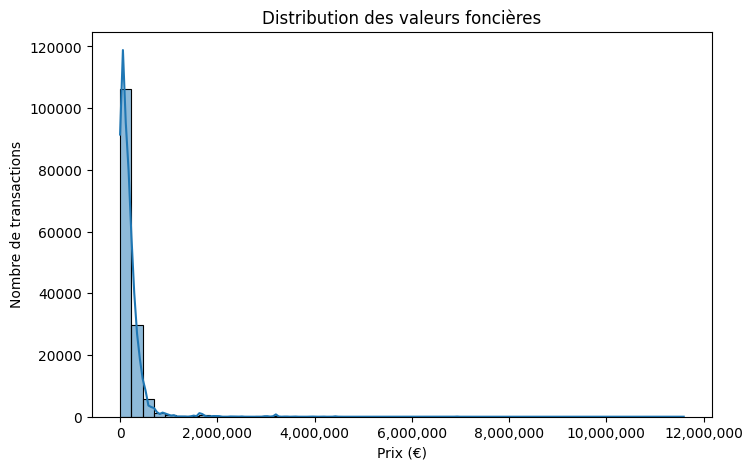

ValueError: Unable to parse string "surface_reelle_bati" at position 13430

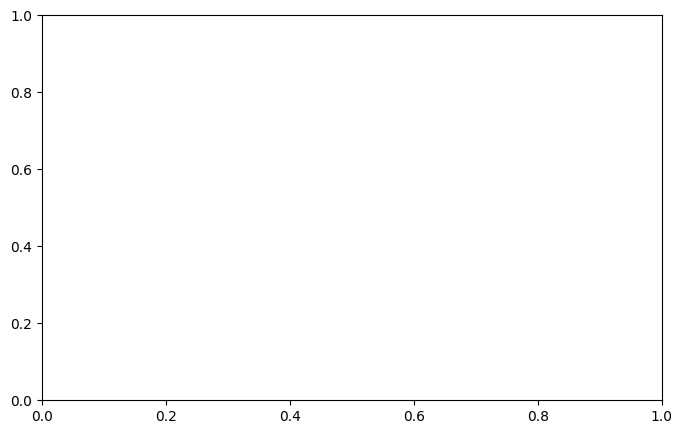

In [ ]:
# Convertir 'surface_reelle_bati' en numérique, en forçant les erreurs à NaN
data['surface_reelle_bati'] = pd.to_numeric(data['surface_reelle_bati'], errors='coerce')

# Convertir 'valeur_fonciere' en numérique, en forçant les erreurs à NaN
data['valeur_fonciere'] = pd.to_numeric(data['valeur_fonciere'], errors='coerce')

# Distribution des prix immobiliers
plt.figure(figsize=(8, 5))
sns.histplot(data["valeur_fonciere"], bins=50, kde=True)
plt.title("Distribution des valeurs foncières")
plt.xlabel("Prix (€)")
plt.ylabel("Nombre de transactions")
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}'))
plt.show()

# Relation entre surface et prix
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data["surface_reelle_bati"], y=data["valeur_fonciere"], hue=data["type_local"])
plt.title("Relation entre surface habitable et prix")
plt.xlabel("Surface habitable (m²)")
plt.ylabel("Prix (€)")
plt.show()

# Répartition des types de biens
plt.figure(figsize=(6, 4))
sns.countplot(x=data["type_local"])
plt.title("Répartition des types de biens")
plt.xticks(rotation=45)
plt.show()